Gravity Simulation: Block in Halfspace
================================

## Geoscientific Problem

For this code comparison, we simulated gravity anomaly data for a density contrast model over a dense block within a homogeneous background. The background density contrast was 0 $g/cm^3$ and the density contrast of the block 0.1 $g/cm^3$. The dimensions of the block in the x, y and z directions were are all 200 m. The block was buried at a depth of 200 m.

Gravity anomaly data were simulated 1 m above the surface. The survey region was 1000 m by 1000 m, the center of which lied directly over the center of the block. The station spacing was 50 m in both the X and Y directions.

*A figure illustrating the density contrast model and survey geometry is shown further down*

## Codes/Formulations Being Compared

**SimPEG 3D Integral Formulation:** This approach to solving the forward problem uses the *SimPEG.potential_fields.gravity.simulation.Simulation3DIntegral* simulation class.

**UBC-GIF GRAV3D v6.0.1:** [GRAV3D v6.0.1](https://grav3d.readthedocs.io/en/v6.0/) is a voxel cell gravity forward modeling and inversion package developed by the UBC Geophysical Inversion Facility. This software is proprietary and can ONLY be acquired through appropriate [academic](https://gif.eos.ubc.ca/software/licenses_academic) or [commerical](https://gif.eos.ubc.ca/software/licenses_commercial) licenses. The numerical approach of the forward simulation is described in the [online manual's theory section](https://grav3d.readthedocs.io/en/v6.0/content/theory.html). If you have a valid license, there are instructions for reproducing the results (add link). 

## Loading Assets Into the SimPEG Framework

We start by importing any necessary packages for running the notebook.

In [1]:
from SimPEG.utils import plot2Ddata
from SimPEG.utils.io_utils import read_grav3d_ubc
from discretize import TensorMesh
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

mpl.rcParams.update({"font.size": 14})

Next we download the mesh, model and simulated data for each code/formulation.

In [2]:
# For each package, download .tar files

The mesh, model and predicted data for each code are then loaded into the SimPEG framework for plotting.

In [3]:
rootdir = './../../../assets/gravity/block_halfspace_gravity_fwd_simpeg/'
mesh_simpeg = TensorMesh.read_UBC(rootdir+'mesh.txt')
model_simpeg = TensorMesh.read_model_UBC(mesh_simpeg, rootdir+'model.den')
data_simpeg = read_grav3d_ubc(rootdir+'dpred_simpeg.grv')

rootdir = './../../../assets/gravity/block_halfspace_gravity_fwd_grav3d/'
mesh_ubc = TensorMesh.read_UBC(rootdir+'mesh.txt')
model_ubc = TensorMesh.read_model_UBC(mesh_simpeg, rootdir+'model.den')
data_ubc = read_grav3d_ubc(rootdir+'gzfor3d.grv')

## Geophysical Scenario

Below, we plot the density contrast model and survey geometry for the forward simulation.

Text(0, 0.5, 'y (m)')

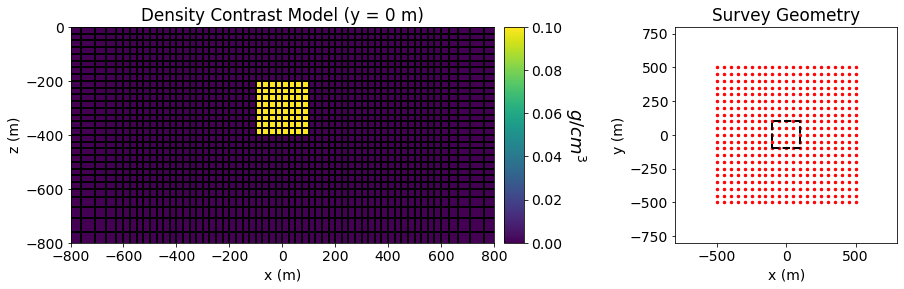

In [4]:
fig = plt.figure(figsize=(14, 4))

ax11 = fig.add_axes([0.1, 0.15, 0.42, 0.75])
ind = int(mesh_simpeg.shape_cells[1]/2)
mesh_simpeg.plot_slice(
    model_simpeg, normal='Y', ind=ind, grid=True, ax=ax11, pcolor_opts={"cmap": "viridis"}
)

ax11.set_xlim([-800, 800])
ax11.set_ylim([-800, 0])
ax11.set_title("Density Contrast Model (y = 0 m)")
ax11.set_xlabel("x (m)")
ax11.set_ylabel("z (m)")

ax12 = fig.add_axes([0.53, 0.15, 0.02, 0.75])
norm = mpl.colors.Normalize(vmin=0, vmax=np.max(model_simpeg))
cbar = mpl.colorbar.ColorbarBase(
    ax12, norm=norm, cmap=mpl.cm.viridis, orientation="vertical"
)
cbar.set_label("$g/cm^3$", rotation=270, labelpad=25, size=18)

xyz = data_simpeg.survey.receiver_locations
ax21 = fig.add_axes([0.7, 0.15, 0.22, 0.75])
ax21.scatter(xyz[:, 0], xyz[:, 1], 6, 'r')
ax21.plot(100*np.r_[-1, 1, 1, -1, -1], 100*np.r_[-1, -1, 1, 1, -1], 'k--', lw=2)
ax21.set_xlim([-800, 800])
ax21.set_ylim([-800, 800])
ax21.set_title("Survey Geometry")
ax21.set_xlabel("x (m)")
ax21.set_ylabel("y (m)")

## Simulated Data Plots

Here we plot the simulated data for all codes.

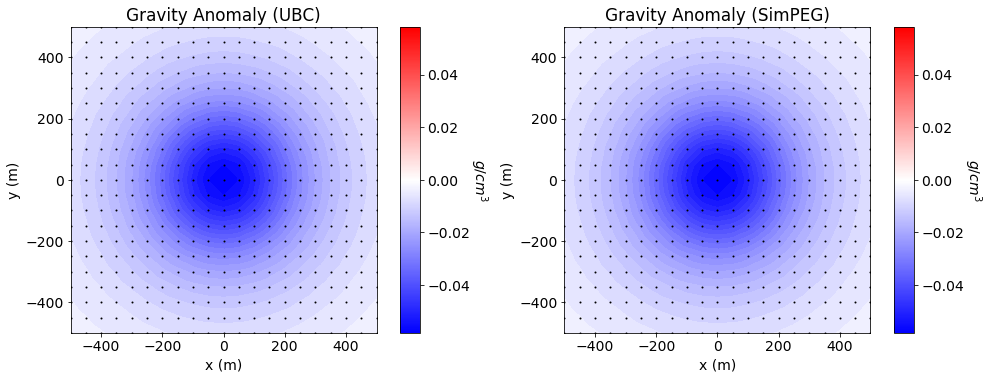

In [5]:
xyz = data_ubc.survey.receiver_locations
dpred_ubc = data_ubc.dobs
dpred_simpeg = data_simpeg.dobs
max_val = np.max(np.abs(np.r_[dpred_ubc, dpred_simpeg]))

fig = plt.figure(figsize=(14, 5))

ax11 = fig.add_axes([0.05, 0.1, 0.37, 0.85])
plot2Ddata(
    xyz, dpred_ubc, ax=ax11, clim=(-max_val, max_val),
    dataloc=True, ncontour=50, contourOpts={"cmap": "bwr"}
)
ax11.set_title("Gravity Anomaly (UBC)")
ax11.set_xlabel("x (m)")
ax11.set_ylabel("y (m)")

ax12 = fig.add_axes([0.41, 0.1, 0.02, 0.85])
norm = mpl.colors.Normalize(vmin=-max_val, vmax=max_val)
cbar12 = mpl.colorbar.ColorbarBase(
    ax12, norm=norm, orientation="vertical", cmap=mpl.cm.bwr
)
cbar12.set_label("$g/cm^3$", rotation=270, labelpad=20, size=14)

ax21 = fig.add_axes([0.54, 0.1, 0.37, 0.85])
plot2Ddata(
    xyz, dpred_simpeg, ax=ax21, clim=(-max_val, max_val),
    dataloc=True, ncontour=50, contourOpts={"cmap": "bwr"}
)
ax21.set_title("Gravity Anomaly (SimPEG)")
ax21.set_xlabel("x (m)")
ax21.set_ylabel("y (m)")

ax22 = fig.add_axes([0.9, 0.1, 0.02, 0.85])
cbar22 = mpl.colorbar.ColorbarBase(
    ax22, norm=norm, orientation="vertical", cmap=mpl.cm.bwr
)
cbar22.set_label("$g/cm^3$", rotation=270, labelpad=20, size=14)

plt.show()

## Error Plots

Here we plot the error and % error between the SimPEG and UBC-GIF formulations.

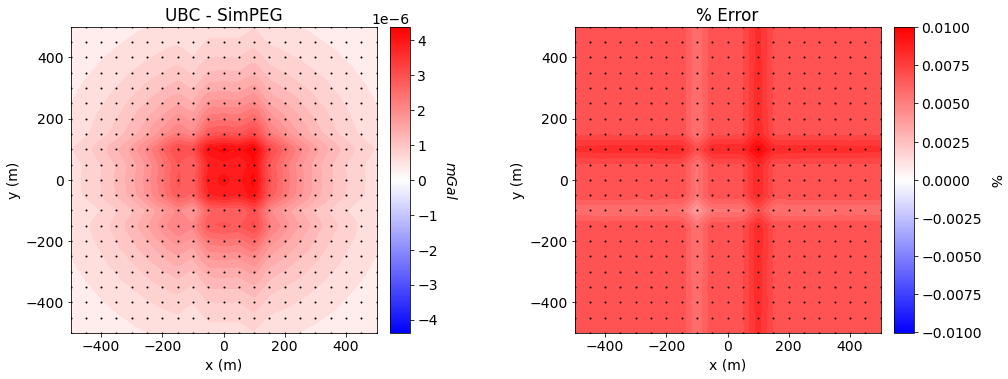

In [6]:
fig = plt.figure(figsize=(14, 5))

max_val = np.max(np.abs(dpred_ubc-dpred_simpeg))

ax11 = fig.add_axes([0.05, 0.1, 0.35, 0.85])
plot2Ddata(
    xyz, dpred_ubc-dpred_simpeg, ax=ax11, clim=(-max_val, max_val),
    dataloc=True, ncontour=40, contourOpts={"cmap": "bwr"}
)
ax11.set_title("UBC - SimPEG")
ax11.set_xlabel("x (m)")
ax11.set_ylabel("y (m)")

ax12 = fig.add_axes([0.39, 0.1, 0.02, 0.85])
norm = mpl.colors.Normalize(vmin=-max_val, vmax=max_val)
cbar12 = mpl.colorbar.ColorbarBase(
    ax12, norm=norm, orientation="vertical", cmap=mpl.cm.bwr
)
cbar12.set_label("$mGal$", rotation=270, labelpad=20, size=14)


tol = 1e-7
max_val = 100*np.max(np.abs((dpred_ubc-dpred_simpeg)/(np.abs(dpred_ubc) + tol*dpred_simpeg.max())))

ax21 = fig.add_axes([0.54, 0.1, 0.37, 0.85])
plot2Ddata(
    xyz, 100*(dpred_ubc-dpred_simpeg)/(np.abs(dpred_ubc) + tol*dpred_simpeg.max()),
    ax=ax21, clim=(-max_val, max_val), dataloc=True, ncontour=40, contourOpts={"cmap": "bwr"}
)
ax21.set_title("% Error")
ax21.set_xlabel("x (m)")
ax21.set_ylabel("y (m)")

ax22 = fig.add_axes([0.89, 0.1, 0.02, 0.85])
norm = mpl.colors.Normalize(vmin=-max_val, vmax=max_val)
cbar22 = mpl.colorbar.ColorbarBase(
    ax22, norm=norm, orientation="vertical", cmap=mpl.cm.bwr
)
cbar22.set_label("%", rotation=270, labelpad=20, size=14)

plt.show()